Hola!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>



<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

Hola Patricio que tal, gracias por los comentarios, adelante dejo las correcciones.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cómo consejo para mejorar la presentación de tus notebooks es que siempre al inicio del mismo en una celda tipo Markdown dejes un título general que describa el proyecto en sí y una breve introducción al mismo para que sea claro lo que se realizará desde un inicio.
</div>

# Proyecto Final

## Entrenamiento y evaluación de modelos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
from datetime import datetime
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [2]:
personal = pd.read_csv('/datasets/final_provider/personal.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')
contract = pd.read_csv('/datasets/final_provider/contract.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

De acuerdo a lo que me comentas mas adelante del EDA, ya lo había realizado en la primera parte del proyecto, lo que fue el plan de trabajo, por lo que no creí que fuera necesario incluirlo aquí también, pero lo anexo nuevamente para completar el análisis inicial.
</div>

## EDA

### Personal

In [3]:
print(personal.info())
print()
print('Shape:',personal.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

Shape: (7043, 5)


In [4]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


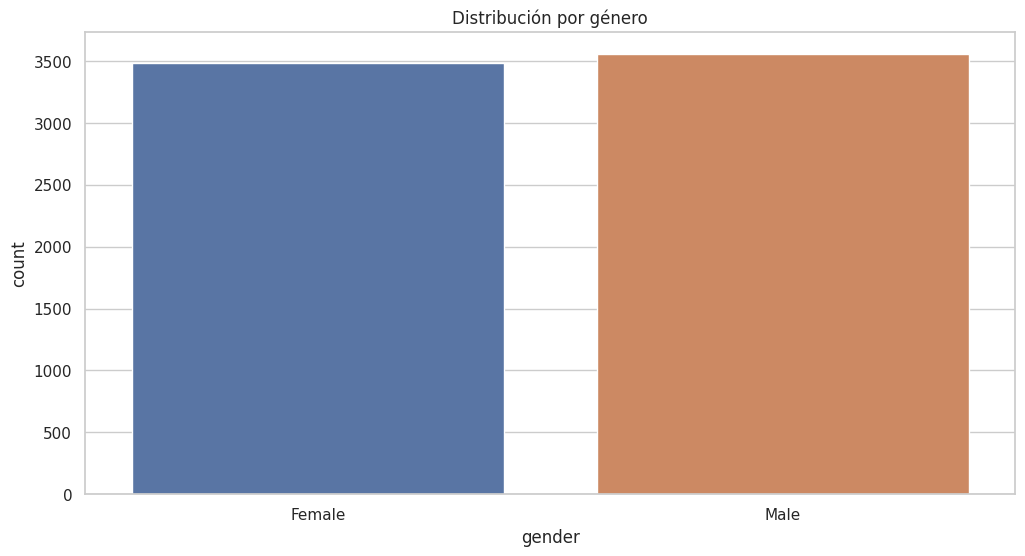

In [5]:
# Distribución de clientes por genero 
sns.countplot(x='gender', data=personal)
plt.title('Distribución por género')
plt.show()

### Contract

In [6]:
print(contract.info())
print()
print('Shape:',contract.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

Shape: (7043, 8)


In [7]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Distribución de contratos y de cargos mensuales

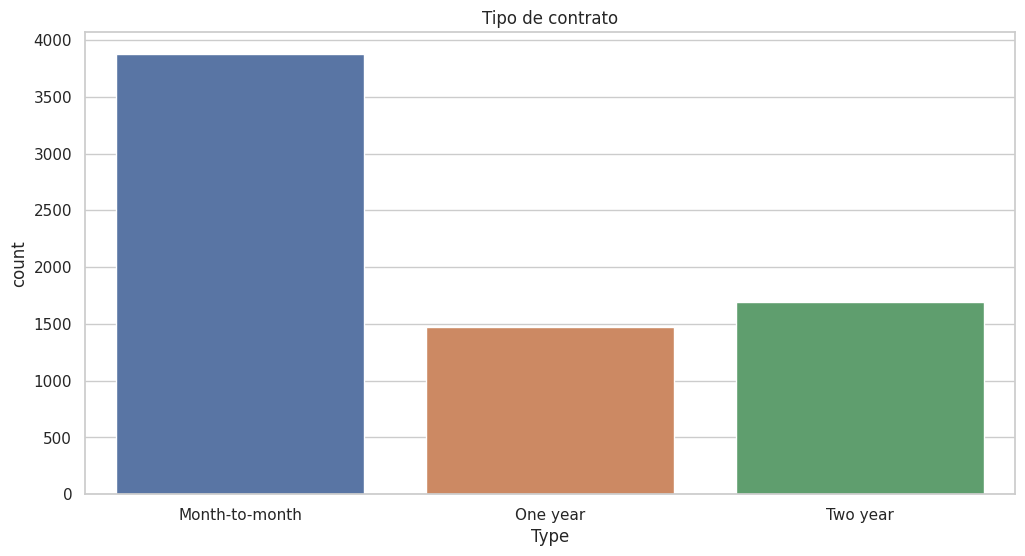

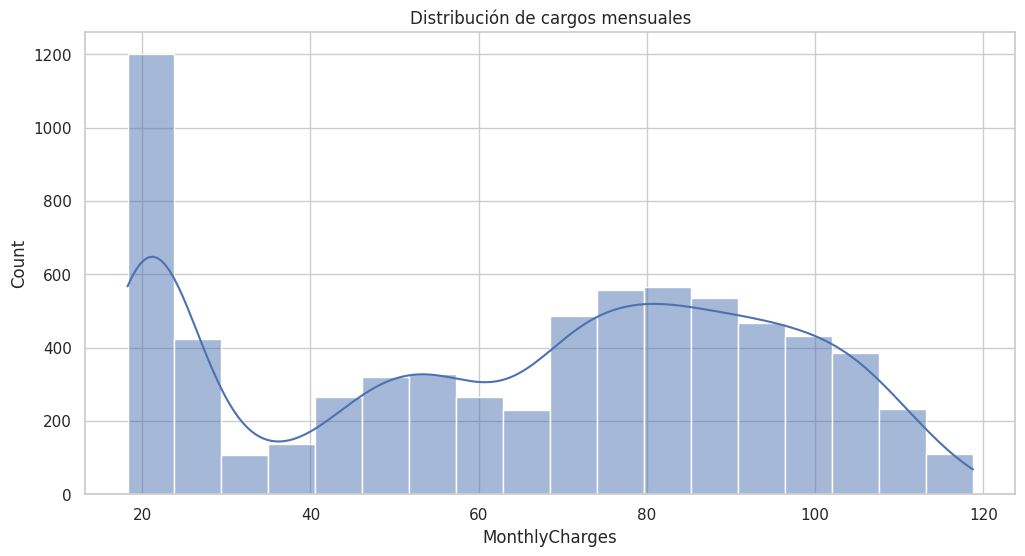

In [8]:
sns.countplot(x='Type', data=contract)
plt.title('Tipo de contrato')
plt.show()

sns.histplot(contract['MonthlyCharges'], kde=True)
plt.title('Distribución de cargos mensuales')
plt.show()

### Phone

In [9]:
print(phone.info())
print()
print('Shape:',phone.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

Shape: (6361, 2)


In [10]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Detalle de líneas

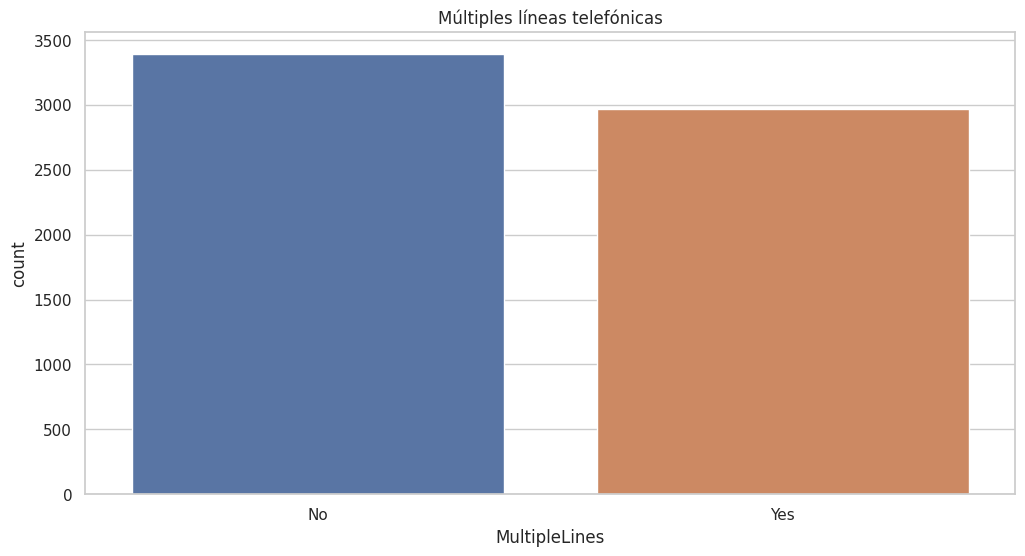

In [11]:
sns.countplot(x='MultipleLines', data=phone)
plt.title('Múltiples líneas telefónicas')
plt.show()

### Internet

In [12]:
print(internet.info())
print()
print('Shape:',internet.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

Shape: (5517, 8)


In [13]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Servicios cntratados por cliente

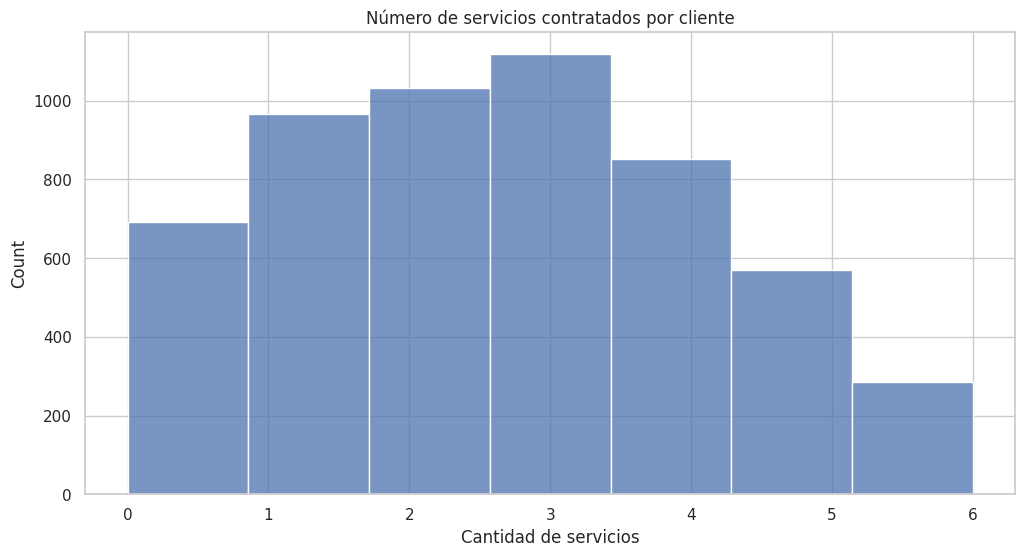

In [15]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
internet_services = cols
internet[internet_services] = internet[internet_services].replace({'Yes': 1, 'No': 0})
internet['num_services'] = internet[internet_services].sum(axis=1)
sns.histplot(internet['num_services'], bins=7)
plt.title('Número de servicios contratados por cliente')
plt.xlabel('Cantidad de servicios')
plt.show()

## Preparación de datos

In [16]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')

In [17]:
print(contract['TotalCharges'].value_counts(dropna=False).head(10))

20.2     11
         11
19.75     9
20.05     8
19.9      8
19.65     8
19.55     7
45.3      7
20.25     6
20.15     6
Name: TotalCharges, dtype: int64


In [18]:
# Reemplazo de espacios vacíos por NaN
contract['TotalCharges'] = contract['TotalCharges'].replace(" ", np.nan)

In [19]:
# Convertir a numérico
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

In [20]:
# Reemplazo de nulos por 0
contract['TotalCharges'] = contract['TotalCharges'].fillna(0)

## Ingenieria de datos

Se crea campo Churn para ubicar clientes que hayan cancelado contrato, Se identificara si el cliente está o no activo, para esto se va a usar la fecha final del archivo contract  

In [21]:
# Se crea columna Churn (1 si EndDate tiene fecha, 0 si está vacío)
contract['Churn'] = contract['EndDate'].notnull().astype(int)

# Verificamos distribución
print(contract['Churn'].value_counts())

0    5174
1    1869
Name: Churn, dtype: int64


## Verificación visual de distribución

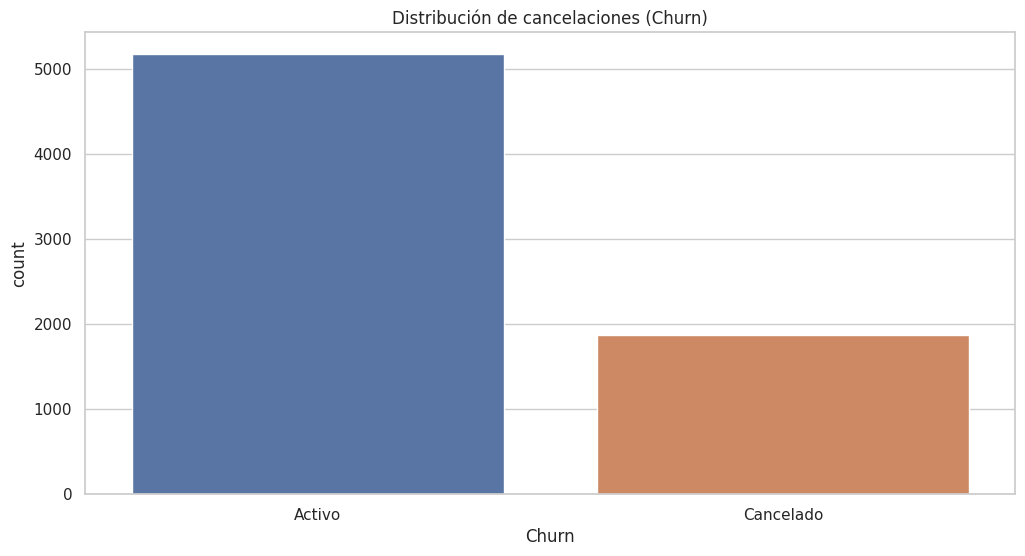

In [22]:
sns.countplot(x='Churn', data=contract)
plt.title('Distribución de cancelaciones (Churn)')
plt.xticks([0,1], ['Activo', 'Cancelado'])
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien revisada esta parte, siempre en proyectos de clasificación lo mejor es revisar el balance entre las clases que se quiere predecir
</div>

In [23]:
today = pd.to_datetime("today")

contract['EndDateFilled'] = contract['EndDate'].fillna(today)

# Se crea columna de duración en meses
contract['CustomerTenureMonths'] = ((contract['EndDateFilled'] - contract['BeginDate']) / np.timedelta64(1, 'm')).round().astype(int)
contract = pd.get_dummies(contract, columns=['Type'], prefix='ContractType')
contract = pd.get_dummies(contract, columns=['PaymentMethod'], prefix='PayMethod')

# Se normaliza TotalCharges por duración para obtener gasto promedio mensual
contract['AvgMonthlySpent'] = contract['TotalCharges'] / contract['CustomerTenureMonths']
contract['AvgMonthlySpent'] = contract['AvgMonthlySpent'].fillna(0)

In [24]:
contract.head()

,customerID,BeginDate,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,EndDateFilled,CustomerTenureMonths,ContractType_Month-to-month,ContractType_One year,ContractType_Two year,PayMethod_Bank transfer (automatic),PayMethod_Credit card (automatic),PayMethod_Electronic check,PayMethod_Mailed check,AvgMonthlySpent
0,7590-VHVEG,2020-01-01,NaT,Yes,29.85,29.85,0,2025-08-14 03:58:45.283690,2955119,1,0,0,0,0,1,0,0.000010
1,5575-GNVDE,2017-04-01,NaT,No,56.95,1889.50,0,2025-08-14 03:58:45.283690,4402319,0,1,0,0,0,0,1,0.000429
2,3668-QPYBK,2019-10-01,2019-12-01,Yes,53.85,108.15,1,2019-12-01 00:00:00.000000,87840,1,0,0,0,0,0,1,0.001231
3,7795-CFOCW,2016-05-01,NaT,No,42.30,1840.75,0,2025-08-14 03:58:45.283690,4884719,0,1,0,1,0,0,0,0.000377
4,9237-HQITU,2019-09-01,2019-11-01,Yes,70.70,151.65,1,2019-11-01 00:00:00.000000,87840,1,0,0,0,0,1,0,0.001726


In [25]:
internet_services = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Se reemplaza "Yes"/"No" por 1/0
internet[internet_services] = internet[internet_services].replace({'Yes': 1, 'No': 0})

# Número de servicios
internet['NumServices'] = internet[internet_services].sum(axis=1)

In [26]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,num_services,NumServices
0,7590-VHVEG,DSL,0,1,0,0,0,0,1,1
1,5575-GNVDE,DSL,1,0,1,0,0,0,2,2
2,3668-QPYBK,DSL,1,1,0,0,0,0,2,2
3,7795-CFOCW,DSL,1,0,1,1,0,0,3,3
4,9237-HQITU,Fiber optic,0,0,0,0,0,0,0,0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el  procesamiento y análisis inicial del dataset, es importante primero garantizar la calidad de los datos y un correcto desempeño de los modelos
</div>

## Preparación del dataset

In [27]:
# Unión de todas las tablas por 'customerID'
df_modelo = personal.merge(phone, on='customerID') \
                    .merge(internet, on='customerID') \
                    .merge(contract, on='customerID')

In [28]:
df_modelo.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,EndDateFilled,CustomerTenureMonths,ContractType_Month-to-month,ContractType_One year,ContractType_Two year,PayMethod_Bank transfer (automatic),PayMethod_Credit card (automatic),PayMethod_Electronic check,PayMethod_Mailed check,AvgMonthlySpent
0,5575-GNVDE,Male,0,No,No,No,DSL,1,0,1,...,2025-08-14 03:58:45.283690,4402319,0,1,0,0,0,0,1,0.000429
1,3668-QPYBK,Male,0,No,No,No,DSL,1,1,0,...,2019-12-01 00:00:00.000000,87840,1,0,0,0,0,0,1,0.001231
2,9237-HQITU,Female,0,No,No,No,Fiber optic,0,0,0,...,2019-11-01 00:00:00.000000,87840,1,0,0,0,0,1,0,0.001726
3,9305-CDSKC,Female,0,No,No,Yes,Fiber optic,0,0,1,...,2019-11-01 00:00:00.000000,352800,1,0,0,0,0,1,0,0.002326
4,1452-KIOVK,Male,0,No,Yes,Yes,Fiber optic,0,1,0,...,2025-08-14 03:58:45.283690,3876719,1,0,0,0,1,0,0,0.000503


Tasa de abandono por categorias

In [29]:
pay_cols = [
    'PayMethod_Bank transfer (automatic)',
    'PayMethod_Credit card (automatic)',
    'PayMethod_Electronic check',
    'PayMethod_Mailed check'
]

df_modelo['PayMethod'] = df_modelo[pay_cols].idxmax(axis=1).str.replace('PayMethod_', '')

In [37]:
categorias = ["ContractType_Month-to-month", "InternetService", "PayMethod"]


Tasa de churn por ContractType_Month-to-month:
ContractType_Month-to-month
1    0.471597
0    0.098387
Name: Churn, dtype: float64


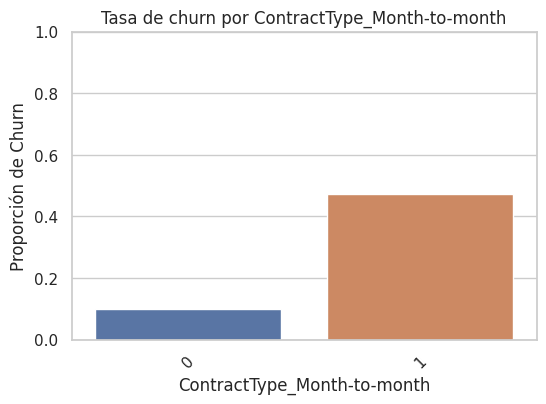


Tasa de churn por PayMethod:
PayMethod
Electronic check             0.475954
Mailed check                 0.285112
Bank transfer (automatic)    0.204864
Credit card (automatic)      0.196721
Name: Churn, dtype: float64


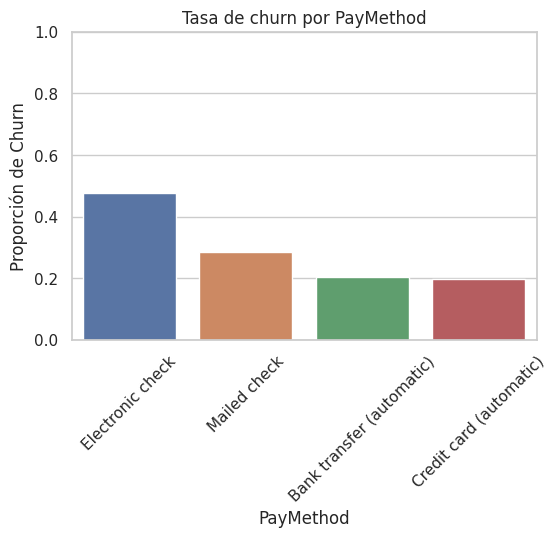

In [38]:
for col in categorias:
    if col in df_modelo.columns:
        churn_rate = df_modelo.groupby(col)["Churn"].mean().sort_values(ascending=False)
        print(f"\nTasa de churn por {col}:")
        print(churn_rate)
        
        plt.figure(figsize=(6,4))
        sns.barplot(x=churn_rate.index, y=churn_rate.values)
        plt.title(f"Tasa de churn por {col}")
        plt.ylabel("Proporción de Churn")
        plt.xticks(rotation=45)
        plt.ylim(0, 1)
        plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Antes de pasar al procesamiento de los datos de cara a lo que se necesita para el modelo se debe realizar un EDA más detallado con apoyo en gráficas que expliquen mejor las variables a utilizar.

Recuerda que tus proyectos siempre deben pasar por un EDA antes de los entrenamientos para garantizar datos limpios y adecuados para el mejor desempeño de los modelos. En esta sección es importante redactar las interpretaciones de lo que se va mostrando
</div>

Codificación de variables categoricas

In [31]:
# Reemplazo Yes/No con 1/0 en columnas binarias
binary_cols = ['Partner', 'Dependents', 'PaperlessBilling']
df_modelo[binary_cols] = df_modelo[binary_cols].replace({'Yes': 1, 'No': 0})

In [32]:
df_modelo = pd.get_dummies(df_modelo, columns=[
    'gender', 'MultipleLines', 'InternetService'
])

Separación de variables y generación de conjuntos de prueba y entrenamiento

In [33]:
X = df_modelo.drop(columns=['customerID', 'BeginDate', 'EndDate', 'EndDateFilled', 'Churn'])
y = df_modelo['Churn']

In [19]:
X.head()

,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,NumServices,...,PayMethod_Credit card (automatic),PayMethod_Electronic check,PayMethod_Mailed check,AvgMonthlySpent,gender_Female,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic
0,0,0,0,1,0,1,0,0,0,2,...,0,0,1,0.000430,0,1,1,0,1,0
1,0,0,0,1,1,0,0,0,0,2,...,0,0,1,0.001231,0,1,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0.001726,1,0,1,0,0,1
3,0,0,0,0,0,1,0,1,1,3,...,0,1,0,0.002326,1,0,0,1,0,1
4,0,0,1,0,1,0,0,1,0,2,...,1,0,0,0.000503,0,1,0,1,0,1


In [20]:
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'NumServices', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'CustomerTenureMonths', 'ContractType_Month-to-month',
       'ContractType_One year', 'ContractType_Two year',
       'PayMethod_Bank transfer (automatic)',
       'PayMethod_Credit card (automatic)', 'PayMethod_Electronic check',
       'PayMethod_Mailed check', 'AvgMonthlySpent', 'gender_Female',
       'gender_Male', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic'],
      dtype='object')

In [21]:
# Se encontró fuga de datos, por lo que se decide eliminar las columnas que lo provocan
X = X.drop(columns=['CustomerTenureMonths', 'AvgMonthlySpent'])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Entrenamiento de modelos

Se van a entrenar Logistic Regression, Random Forest Classifier y XGB Classifier. Para medir su efectividad se usaran las metricas F1 score, Roc Auc score

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

In [26]:
# Función para evaluar modelos

resultados = []

for nombre, modelo in modelos.items():
    if nombre == "Logistic Regression":
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
        y_pred_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        y_pred_proba = modelo.predict_proba(X_test)[:, 1]
    
    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred_proba)
    })

/.venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [27]:
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by="ROC AUC", ascending=False)
print(df_resultados)

                Modelo  Accuracy  Precision    Recall        F1   ROC AUC
0  Logistic Regression  0.784902   0.699634  0.602524  0.647458  0.839549
1        Random Forest  0.766287   0.678431  0.545741  0.604895  0.816969
2              XGBoost  0.760083   0.652330  0.574132  0.610738  0.811393


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

Agrego comentario interpretando los resultados del entrenamiento de los modelos.
</div>

Con los resultados obtenidos despues del entrenamiento, podemos verificar que el modelo de regresión logistica fue el que mejor rendimiento tuvo al obtener un accuracy del 78% y un 0.64 y 0.83 en F1 y Roc-AUC respectivamente, para el caso de precision y recall, se puede observar que todos los modelos son conservadores al predecir Churn, esto puede verse afectado por la distribución o desbalance de clases.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el entrenamiento de los modelos! Obtuviste muy buenas métricas. Para dejar el proyecto mucho mejor explicado se debería también redactar que es lo que se puede interpretar del desempeño de los modelos en base a los resultados obtenidos y cómo el desbalance puede o no afectar el mismo
</div>

In [28]:
# Métricas a evaluar en validación cruzada
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

In [29]:
# Función para evaluar las metricas en validación cruzada

resultados_cv = []

for nombre, modelo in modelos.items():
    cv_result = cross_validate(modelo, X, y, cv=5, scoring=scoring, return_train_score=False)
    
    resultados_cv.append({
        "Modelo": nombre,
        "Accuracy": cv_result['test_accuracy'].mean(),
        "Precision": cv_result['test_precision'].mean(),
        "Recall": cv_result['test_recall'].mean(),
        "F1": cv_result['test_f1'].mean(),
        "ROC AUC": cv_result['test_roc_auc'].mean()
    })

/.venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/.venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/.venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClas

In [30]:
df_resultados_cv = pd.DataFrame(resultados_cv)
print(df_resultados_cv)

                Modelo  Accuracy  Precision    Recall        F1   ROC AUC
0  Logistic Regression  0.761117   0.652625  0.581985  0.615028  0.812160
1        Random Forest  0.748294   0.644737  0.521431  0.576419  0.793330
2              XGBoost  0.743744   0.623441  0.554231  0.586359  0.790388


## Evaluación de modelos

In [31]:
# Función para evaluar modelos

resultados = []

def evaluar_modelo_guardar(modelo, X_train, y_train, X_test, y_test, nombre):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    resultados.append({
        "Modelo": nombre,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC AUC": roc_auc
    })

In [32]:
evaluar_modelo_guardar(LogisticRegression(max_iter=1000, random_state=42), X_train, y_train, X_test, y_test, "Logistic Regression")
evaluar_modelo_guardar(RandomForestClassifier(n_estimators=100, random_state=42), X_train, y_train, X_test, y_test, "Random Forest")
evaluar_modelo_guardar(XGBClassifier(eval_metric="logloss", random_state=42), X_train, y_train, X_test, y_test, "XGBoost")

/.venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [33]:
df_resultados = pd.DataFrame(resultados)

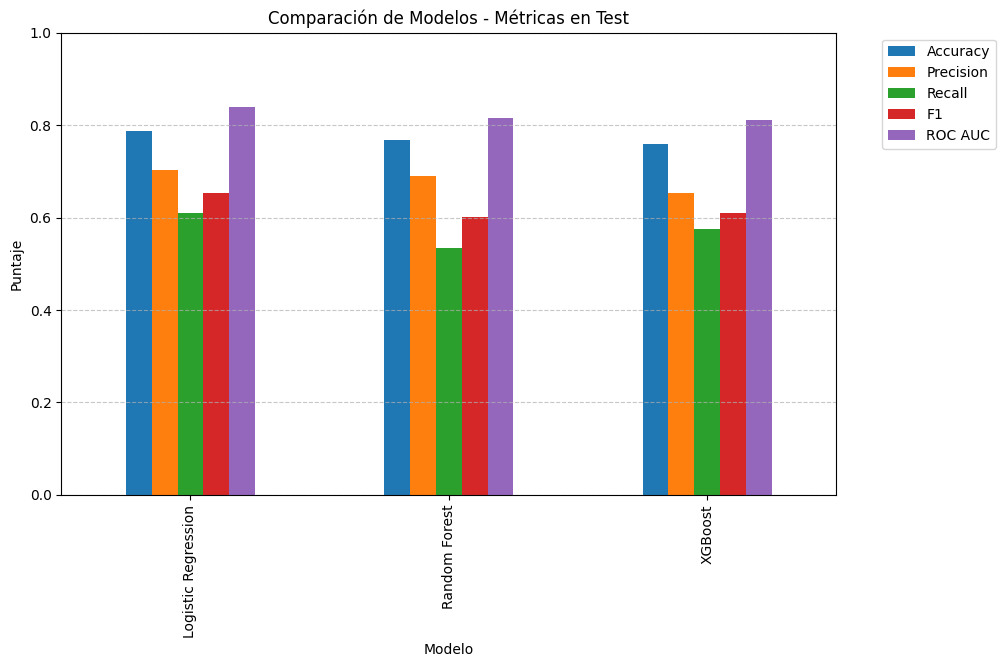

In [36]:
df_resultados.set_index("Modelo").plot(kind="bar", figsize=(10,6))
plt.title("Comparación de Modelos - Métricas en Test")
plt.ylabel("Puntaje")
plt.ylim(0,1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.rot(45)
plt.show()

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

Agrego comentarios adicionales a la conclusión general.
</div>

## Conclusiones generales

Al analizar el conjunto de datos podemos determinar que hay diversos motivos para el abandono de clientes, en cuanto a los servicios de internet tenemos el mayor abandono entre aquellos que tienen un servicio de fibra óptica, lo cual es curioso ya que es el mejor servicio ofrecido, puede ser que se resistan al cambio de tecnología.

En cuanto a los que cuentan con contrato el mayor abandono está entre los que cuentan con uno de tipo mes a mes.

En el caso del método de pago tenemos en mayor abandono en aquellos que lo realizan por medio de cheque electrónico.

En el tema del entrenamiento de modelos se determinó que el mejor evaluado fue el de regresión logística, aunque los otros se acercan bastante este último tuvo mejor resultado en las métricas F1 y AUC-ROC, además de tener mejor evaluación en precision y recall por lo que se recomienda utilizarlo.

Como sugerencia final, para evitar el abandono de clientes se recomienda realizar campañas de información en cuanto al cambio de tecnologías, así como ofrecer diversos contratos y avisos en las facilidades otorgadas en los métodos de pago.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Las conclusiones generales deberían ser más detalladas. Esta sección es la parte donde se resume los hallazgos más importantes respecto a lo analizado u obtenido en tu proyecto
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteración)</b> <a class=“tocSkip”></a>

¡Buen trabajo con el desarrollo del proyecto!
    
Realizaste una muy buena exploración de tus datos y planteaste comentarios acertados de los resultados, las métricas utilizadas para tus modelos son las adecuadas,
    
Me gustaría dejarte algunas recomendaciones para que resaltes tu perfil profesional en el mundo laboral:
    
- **Exponer los modelos:** Puedes agregar más valor a tu perfil profesional exponiendo los modelos para que puedan ser utilizados en algún demo, esto puedes hacerlo con streamlit y en render.com cómo lo hiciste en un sprint anterior. Pero si quieres ir más allá también podrías investigar y hacerlo utilizando el framework de FastAPI.
- **Herramientas cloud:** Para demostrar un perfil más completo, también podrías utilizar algún servicio cloud cómo AWS y tratar de subir tus modelos entrenados ahí. No tienes que hacerlo a manera de experto, pero siempre es un plus tener conocimiento de estas herramientas.
- **Continúa aprendiendo y practicando:** La práctica hace al maestro, mientras más practiques más errores podrás solucionar y estarás más listo para afrontar problemas reales en un entorno laboral.
    
Saludos y felicidades!
</div>